In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import verde as vd
import harmonica as hm
import eqs_magnetics as eqs

In [2]:
icegrav = pd.read_csv('../data/icegrav.csv', header=0)
lcs1 = pd.read_csv('/home/jupyter-india/satellite/fieldvals', names=['bx', 'by', 'bz'], delim_whitespace=True)

In [3]:
grid_coordinates = vd.grid_coordinates([-84.4,-75.0,-35.2,27.6], spacing=0.05, extra_coords=3e3)

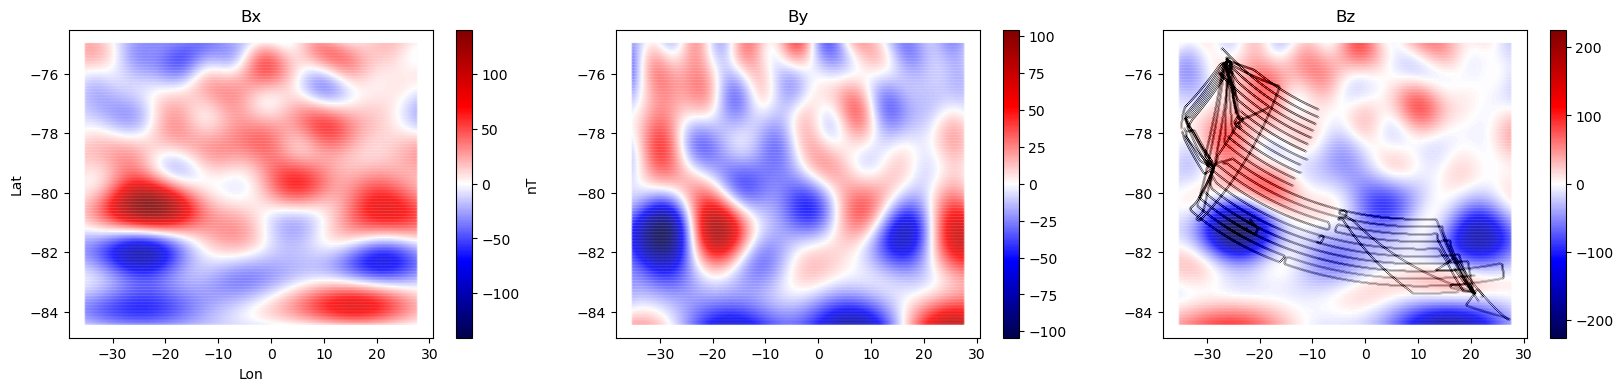

In [4]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
scale = vd.maxabs(lcs1.bx)
# scale = np.nanpercentile(lcs1.bx, 99)
plt.scatter(grid_coordinates[1], grid_coordinates[0], c=lcs1.bx, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.title("Bx")
plt.xlabel("Lon")
plt.ylabel("Lat")
plt.colorbar(label="nT")
plt.subplot(1,3,2)
scale = vd.maxabs(lcs1.by)
# scale = np.nanpercentile(lcs1.by, 99)
plt.scatter(grid_coordinates[1], grid_coordinates[0], c=lcs1.by, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.title("By")
plt.colorbar()
plt.subplot(1,3,3)
scale = vd.maxabs(lcs1.bz)
# scale = np.nanpercentile(lcs1.bz, 99)
plt.scatter(grid_coordinates[1], grid_coordinates[0], c=lcs1.bz, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.plot(icegrav.Lon, icegrav.Lat, 'k.', markersize=0.005)
plt.title("Bz")
plt.colorbar()
plt.show()

In [7]:
field_direction = np.array([hm.magnetic_angles_to_vec(1, -65, 25)]).T

In [9]:
tfa = eqs.total_field_anomaly([lcs1.bx, lcs1.by, lcs1.bz], field_direction)
bnorm = eqs.magnetic_field_norm([lcs1.bx, lcs1.by, lcs1.bz])

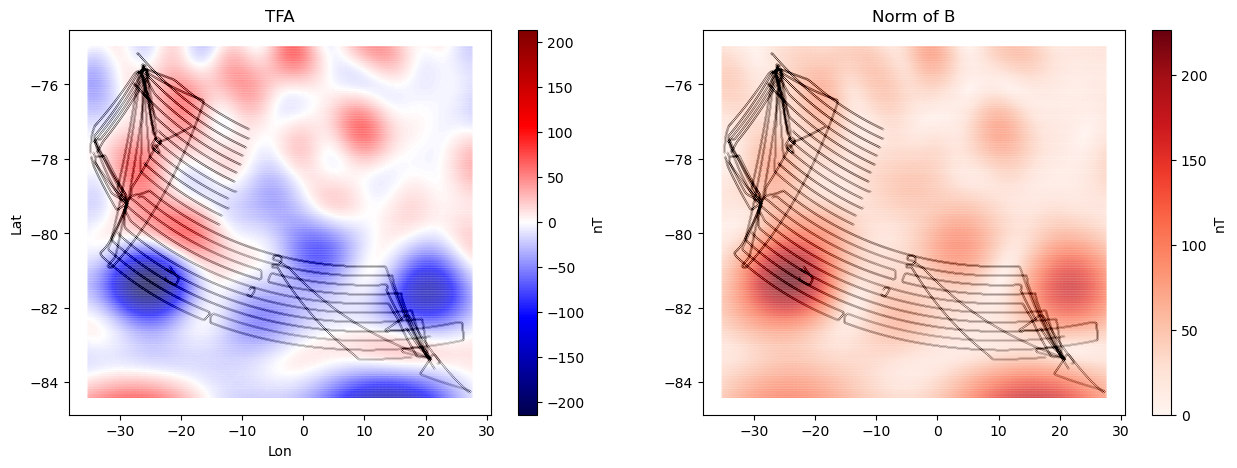

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
scale = vd.maxabs(tfa)
plt.scatter(grid_coordinates[1], grid_coordinates[0], c=tfa, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.plot(icegrav.Lon, icegrav.Lat, 'k.', markersize=0.005)
plt.title("TFA")
plt.xlabel("Lon")
plt.ylabel("Lat")
plt.colorbar(label="nT")

plt.subplot(1,2,2)
scale = vd.maxabs(bnorm)
plt.scatter(grid_coordinates[1], grid_coordinates[0], c=bnorm, cmap="Reds",s=0.01, vmin=0, vmax=scale)
plt.plot(icegrav.Lon, icegrav.Lat, 'k.', markersize=0.005)
plt.title("Norm of B")
plt.colorbar(label="nT")
plt.show()